In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
train_data = pd.read_csv("/kaggle/input/used-cars-price-prediction/train-data.csv", na_values = ["null bhp"])
test_data = pd.read_csv("/kaggle/input/used-cars-price-prediction/test-data.csv", na_values = ["null bhp"])

In [152]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [153]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5876 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


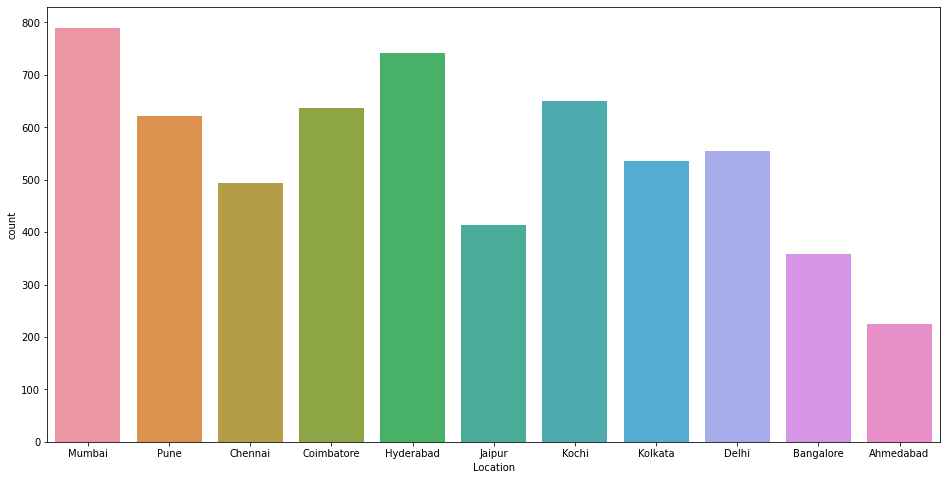

In [154]:
plt.figure(figsize = (16,8))
sns.countplot(train_data['Location'])

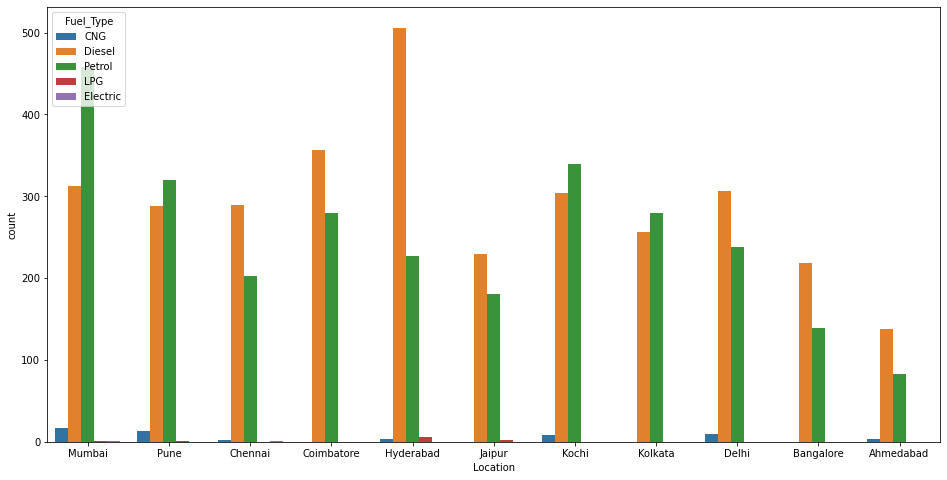

In [155]:
plt.figure(figsize = (16,8))
sns.countplot(train_data['Location'], hue = train_data["Fuel_Type"])

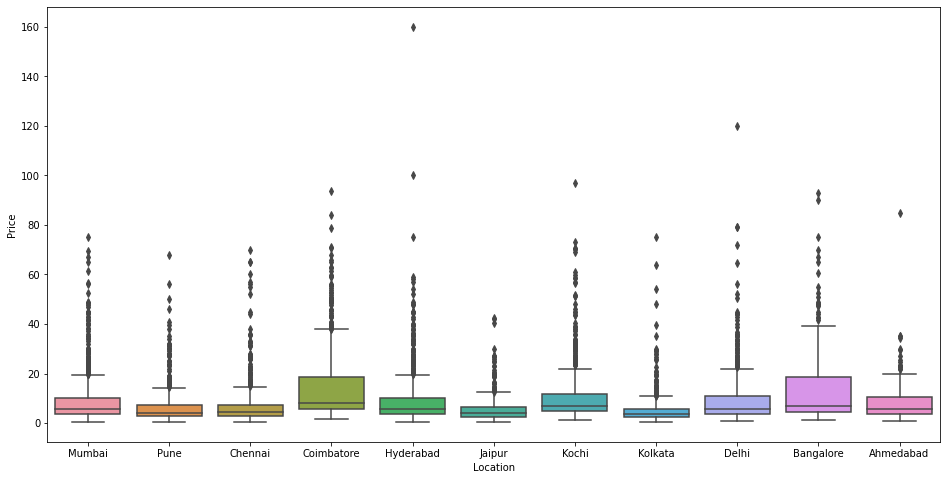

In [156]:
plt.figure(figsize = (16,8))
sns.boxplot(x="Location", y = "Price", data = train_data)

In [157]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [158]:
# Deleting New_Price column since it has too many null values

train_data.drop("New_Price", axis = 1, inplace = True)

In [159]:
train_data.isnull().sum()

Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [160]:
train_data.corr()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
Unnamed: 0,1.000000,0.002354,-0.008734,-0.010832,-0.020275
Year,0.002354,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.008734,-0.173048,1.000000,0.083113,-0.011493
Seats,-0.010832,0.012333,0.083113,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


In [161]:
# removing Unnamed: 0 since it has no role

train_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [162]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [163]:
train_data["Seats"].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [164]:
# since most of the cars have 5 Seats, we will fill the null values in Seats columns as "5"

train_data["Seats"].fillna(train_data["Seats"].value_counts().values[0], inplace = True)

In [165]:
train_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

In [166]:
def convert_power_data(val):
    if not pd.isnull(val):
        return float(val.split(' ')[0])
    return val

train_data["Power"] = train_data["Power"].apply(lambda val: convert_power_data(val))

In [167]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,17.74


In [168]:
train_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

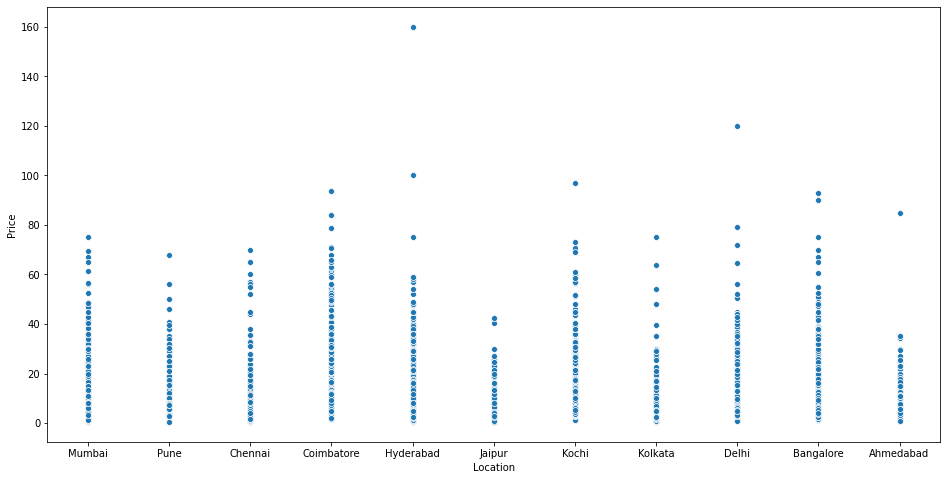

In [169]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = train_data["Location"], y = train_data["Price"])

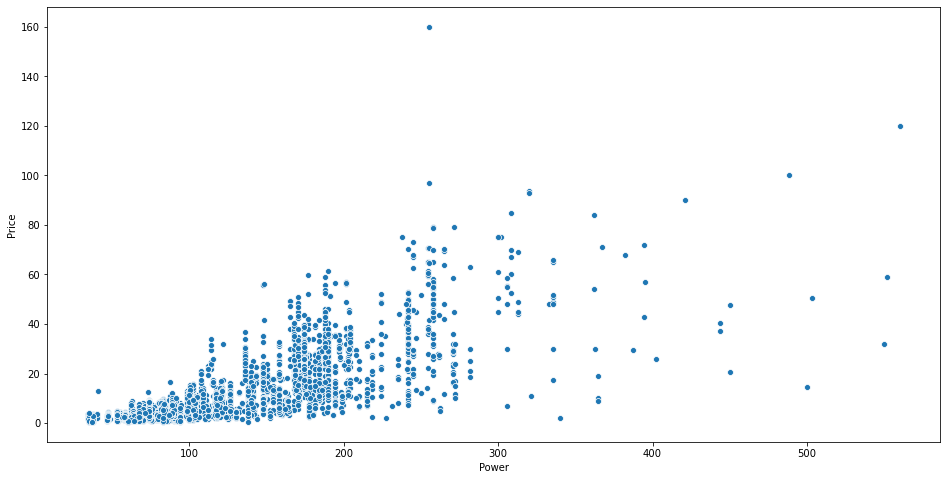

In [170]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = train_data["Power"], y = train_data["Price"])

In [171]:
train_data["Power"].mean()

113.25304969366827

In [172]:
train_data["Power"].fillna(train_data["Power"].mean(), inplace = True)

In [173]:
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                 0
Price                 0
dtype: int64

In [174]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 564.4+ KB


In [175]:
def convert_engine_data(val):
    if not pd.isnull(val):
        return float(val.split(' ')[0])
    return val

train_data["Engine"] = train_data["Engine"].apply(lambda val: convert_power_data(val))

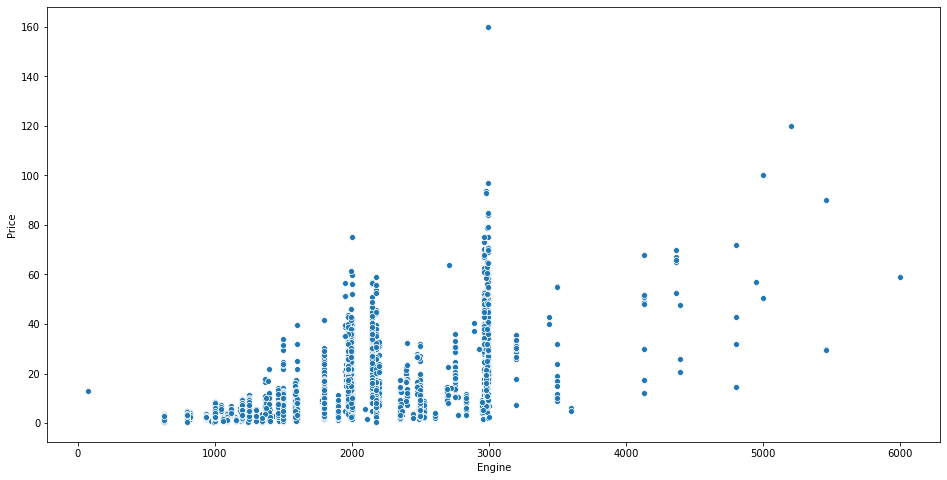

In [176]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = train_data["Engine"], y = train_data["Price"])

In [177]:
train_data["Engine"].fillna(train_data["Engine"].median(), inplace = True)

In [178]:
train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [179]:
def convert_mileage_data(val):
    if not pd.isnull(val):
        return float(val.split(' ')[0])
    return val

train_data["Mileage"] = train_data["Mileage"].apply(lambda val: convert_power_data(val))

In [180]:
train_data.dropna(inplace = True)

In [181]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6017 non-null   float64
 9   Power              6017 non-null   float64
 10  Seats              6017 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.1+ KB


In [182]:
# Dropping Name Column

train_data.drop(["Name", "Location"], axis = 1, inplace = True)

In [183]:
train_data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [184]:
train_data["Owner_Type"].value_counts()

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [185]:
train_data["Transmission"].value_counts()

Manual       4299
Automatic    1718
Name: Transmission, dtype: int64

In [186]:
train_data["Fuel_Type"].value_counts()

Diesel    3205
Petrol    2746
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [187]:
train_data["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [188]:
encoded_data = pd.get_dummies(data = train_data, columns = ["Fuel_Type", "Transmission", "Owner_Type"], drop_first = True)

In [189]:
encoded_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0,1,0


In [190]:
train_data = encoded_data

In [191]:
train_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0,1,0


In [192]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6017 non-null   int64  
 1   Kilometers_Driven          6017 non-null   int64  
 2   Mileage                    6017 non-null   float64
 3   Engine                     6017 non-null   float64
 4   Power                      6017 non-null   float64
 5   Seats                      6017 non-null   float64
 6   Price                      6017 non-null   float64
 7   Fuel_Type_Diesel           6017 non-null   uint8  
 8   Fuel_Type_LPG              6017 non-null   uint8  
 9   Fuel_Type_Petrol           6017 non-null   uint8  
 10  Transmission_Manual        6017 non-null   uint8  
 11  Owner_Type_Fourth & Above  6017 non-null   uint8  
 12  Owner_Type_Second          6017 non-null   uint8  
 13  Owner_Type_Third           6017 non-null   uint8

In [193]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [194]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop("Price", axis = 1), train_data["Price"], test_size = 0.08, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(128, activation = 'relu', input_dim = 13))

# Adding the second hidden layer
model.add(Dense(units = 128, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 64, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the sixth hidden layer
model.add(Dense(units = 16, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size = 64, epochs = 200)

# y_pred = model.predict(X_test)
print(history.history.keys())


Epoch 1/200
87/87 [==============================] - 0s 2ms/step - loss: 83.2217 - mae: 4.9363
Epoch 2/200
87/87 [==============================] - 0s 2ms/step - loss: 26.5800 - mae: 2.6552
Epoch 3/200
87/87 [==============================] - 0s 2ms/step - loss: 22.2170 - mae: 2.3750
Epoch 4/200
87/87 [==============================] - 0s 2ms/step - loss: 20.2717 - mae: 2.2110
Epoch 5/200
87/87 [==============================] - 0s 2ms/step - loss: 20.7642 - mae: 2.2617
Epoch 6/200
87/87 [==============================] - 0s 2ms/step - loss: 19.5823 - mae: 2.1858
Epoch 7/200
87/87 [==============================] - 0s 2ms/step - loss: 20.3041 - mae: 2.1982
Epoch 8/200
87/87 [==============================] - 0s 2ms/step - loss: 20.6181 - mae: 2.2171
Epoch 9/200
87/87 [==============================] - 0s 2ms/step - loss: 17.7431 - mae: 2.0726
Epoch 10/200
87/87 [==============================] - 0s 2ms/step - loss: 17.9277 - mae: 2.0722
Epoch 11/200
87/87 [=============================

87/87 [==============================] - 0s 2ms/step - loss: 11.0601 - mae: 1.5715
Epoch 87/200
87/87 [==============================] - 0s 2ms/step - loss: 10.8634 - mae: 1.5482
Epoch 88/200
87/87 [==============================] - 0s 2ms/step - loss: 11.3931 - mae: 1.5528
Epoch 89/200
87/87 [==============================] - 0s 2ms/step - loss: 11.9312 - mae: 1.6271
Epoch 90/200
87/87 [==============================] - 0s 2ms/step - loss: 10.5303 - mae: 1.5184
Epoch 91/200
87/87 [==============================] - 0s 2ms/step - loss: 11.5740 - mae: 1.6252
Epoch 92/200
87/87 [==============================] - 0s 2ms/step - loss: 11.3617 - mae: 1.5895
Epoch 93/200
87/87 [==============================] - 0s 2ms/step - loss: 10.8616 - mae: 1.5261
Epoch 94/200
87/87 [==============================] - 0s 2ms/step - loss: 10.5762 - mae: 1.4952
Epoch 95/200
87/87 [==============================] - 0s 2ms/step - loss: 11.7220 - mae: 1.6042
Epoch 96/200
87/87 [==============================] -

87/87 [==============================] - 0s 2ms/step - loss: 7.7952 - mae: 1.2696
Epoch 172/200
87/87 [==============================] - 0s 2ms/step - loss: 8.3792 - mae: 1.3166
Epoch 173/200
87/87 [==============================] - 0s 2ms/step - loss: 7.2415 - mae: 1.2148
Epoch 174/200
87/87 [==============================] - 0s 2ms/step - loss: 7.4245 - mae: 1.2543
Epoch 175/200
87/87 [==============================] - 0s 2ms/step - loss: 7.8073 - mae: 1.2965
Epoch 176/200
87/87 [==============================] - 0s 2ms/step - loss: 6.8684 - mae: 1.2229
Epoch 177/200
87/87 [==============================] - 0s 2ms/step - loss: 8.0671 - mae: 1.3231
Epoch 178/200
87/87 [==============================] - 0s 2ms/step - loss: 7.7162 - mae: 1.2836
Epoch 179/200
87/87 [==============================] - 0s 2ms/step - loss: 7.6993 - mae: 1.2877
Epoch 180/200
87/87 [==============================] - 0s 2ms/step - loss: 7.1274 - mae: 1.2290
Epoch 181/200
87/87 [==============================] -

In [195]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mae,epoch
195,7.234998,1.270164,195
196,6.952169,1.196312,196
197,6.289364,1.166665,197
198,6.204992,1.127518,198
199,6.360923,1.142870,199


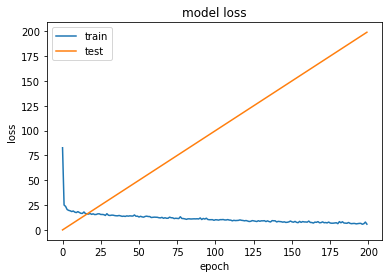

In [146]:
plt.plot(hist['loss'])
plt.plot(hist['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [148]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 967us/step - loss: 16.5348


16.53481674194336